In [1]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
DF = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/goodvideogames/youtube_comments_Nci6Oy_rNhY.csv")
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=Nci6Oy_rNhY,Final Fantasy 7 Rebirth Review,2024-02-22T14:00:16Z,@zaidebtw4438,For people saying the ending is ruined and pal...,2024-11-07T19:23:36Z,0,0
1,https://www.youtube.com/watch?v=Nci6Oy_rNhY,Final Fantasy 7 Rebirth Review,2024-02-22T14:00:16Z,@emmanuelguillermo3013,"As a die hard fan of the original, this first ...",2024-11-06T02:00:08Z,0,0
2,https://www.youtube.com/watch?v=Nci6Oy_rNhY,Final Fantasy 7 Rebirth Review,2024-02-22T14:00:16Z,@Givemeafatbreak,Never playes FF in my life. I'm 40. 😢. Love ...,2024-11-03T21:43:16Z,0,0
3,https://www.youtube.com/watch?v=Nci6Oy_rNhY,Final Fantasy 7 Rebirth Review,2024-02-22T14:00:16Z,@SirMitsuruji5,Bought this game day 1 but still havent played...,2024-10-30T16:51:01Z,0,0
4,https://www.youtube.com/watch?v=Nci6Oy_rNhY,Final Fantasy 7 Rebirth Review,2024-02-22T14:00:16Z,@rickyrolls6460,why is this not on steam ?,2024-10-23T15:24:50Z,0,0
...,...,...,...,...,...,...,...,...
861,https://www.youtube.com/watch?v=Nci6Oy_rNhY,Final Fantasy 7 Rebirth Review,2024-02-22T14:00:16Z,@kingshadow8782,Morning.,2024-02-22T14:01:44Z,0,0
862,https://www.youtube.com/watch?v=Nci6Oy_rNhY,Final Fantasy 7 Rebirth Review,2024-02-22T14:00:16Z,@gamerockz2141,They gave it a 9,2024-02-22T14:01:28Z,213,5763
863,https://www.youtube.com/watch?v=Nci6Oy_rNhY,Final Fantasy 7 Rebirth Review,2024-02-22T14:00:16Z,@frogdaddy420,😢,2024-02-22T14:01:25Z,0,0
864,https://www.youtube.com/watch?v=Nci6Oy_rNhY,Final Fantasy 7 Rebirth Review,2024-02-22T14:00:16Z,@JakeBalla,First,2024-02-22T14:01:17Z,0,1


In [3]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update([
    'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])
new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
    'good', 'like', 'concord', 'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score',"game", 
    "free", "before", "buy", "play","remake", "story", "like", "review", "ff7", "games", 
    "rebirth", "final", "play", "wait","gave","goty","first","xbox","coming","come","say",
    "lol","part","another","still","would","let","one","give","ready","tifa","going","aerith","look"



])
lmtzr = WordNetLemmatizer()

In [4]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts

def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams


In [54]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
159,2024-02-29,never played this game before...i may buy,played game beforei may buy
160,2024-02-29,Dating with Barret in gold saucer is the best ...,dating barret gold saucer best romance moment
161,2024-02-29,Let me sum the experience up for ya. Great voi...,let sum experience great voice acting great gr...
162,2024-02-29,Is this game worth it never played ay of them ...,game worth played bored something ps5
163,2024-02-29,Your whole staff and website besides destin ar...,whole staff website besides destin bunch buffoon
...,...,...,...
861,2024-02-22,Morning.,morning
862,2024-02-22,They gave it a 9,gave
863,2024-02-22,😢,
864,2024-02-22,First,first


In [58]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=0).reset_index(drop=True)  # Use any integer as the random_state

In [60]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['comment'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df

The video has mostly positive comments.


,publishedTimeText,comment,processed_comments,sentiment
0,2024-02-22,"Sorry, but this is a 10/10",sorry 1010,negative
1,2024-02-22,is there other elemental material that is as s...,elemental material strong flair like storm hur...,positive
2,2024-02-23,Deserves a 9.5,deserves,neutral
3,2024-02-22,Sick of damn card games in rpgs,sick damn card game rpgs,negative
4,2024-02-22,PS5 Up.,ps5,neutral
...,...,...,...,...
495,2024-02-22,New timelines make it overly convoluted and im...,new timeline overly convoluted impossible foll...,positive
496,2024-02-22,The convoluted story is not a flawed. This is...,convoluted story flawed 2nd act game wait conc...,neutral
497,2024-02-23,Are we getting Nomura'd again? Sigh,getting nomurad sigh,positive
498,2024-02-22,Looks like its made with quality and game of t...,look like quality game year contender,positive


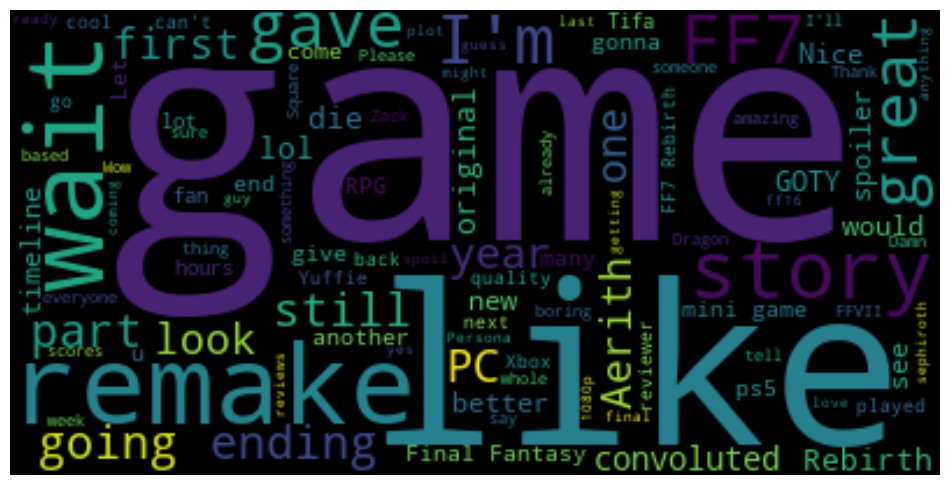

In [62]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

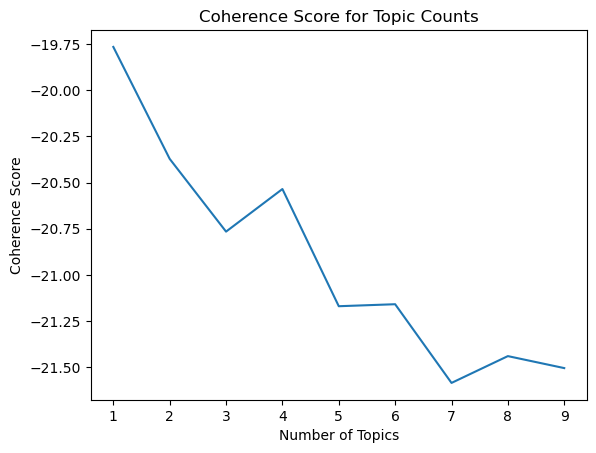

In [64]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 10)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [68]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 4
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.007*"gon" + 0.006*"wow" + 0.006*"great" + 0.004*"year" + 0.004*"better" + 0.004*"week" + 0.004*"see" + 0.004*"based" + 0.004*"sound" + 0.004*"yes"'), (1, '0.015*"nice" + 0.007*"ending" + 0.006*"mini" + 0.005*"original" + 0.004*"zack" + 0.004*"bad" + 0.004*"many" + 0.004*"alive" + 0.004*"hyped" + 0.004*"main"'), (2, '0.009*"spoiler" + 0.007*"japan" + 0.005*"release" + 0.005*"quality" + 0.005*"thank" + 0.004*"welcome" + 0.004*"deserves" + 0.004*"guess" + 0.004*"nine" + 0.004*"day"'), (3, '0.007*"dead" + 0.006*"year" + 0.005*"die" + 0.005*"amazing" + 0.005*"died" + 0.004*"great" + 0.004*"port" + 0.004*"graphic" + 0.004*"omg" + 0.004*"turn"')]


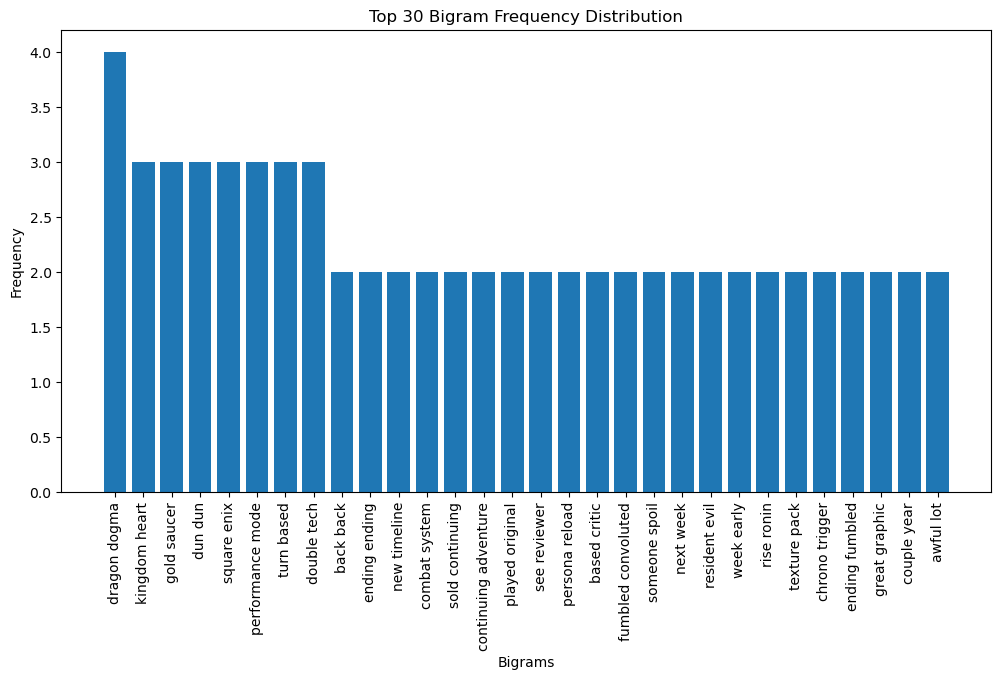

In [70]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [74]:
#Load the existing df_topics CSV file
#title=DF['title'].unique()
#file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_good_topics.csv'
#df_good_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
#new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
#df_good_topics = pd.concat([df_good_topics, new_row], ignore_index=True)
# Save the updated DataFrame back to the CSV file
#df_good_topics.to_csv(file_path, index=False)
#df_good_topics

,title,num_topics
0,GTA 5 - Review,3
1,Space Marine 2 - Before You Buy,5
2,Alan Wake 2 - Before You Buy,4
3,PlayerUnknown's Battlegrounds (PS4) - Before Y...,4
4,Apex Legends - Before You Buy,2
5,Uncharted 4: A Thief's End Review,4
6,Super Mario Bros. Wonder Review,4
7,Red Dead Redemption 2 Review,6
8,The Legend of Zelda: Tears of the Kingdom Review,6
9,Final Fantasy 7 Rebirth Review,4
